In [37]:
# Cell 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import joblib
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [38]:
# Cell 2: Define data loading and preprocessing function
def xload_and_preprocess_data3(data_path):
    """Load and preprocess IoT cybersecurity data"""
    print(f"Loading data from {data_path}...")
    
    # Load data - adjust column names according to your dataset format
    df = pd.read_csv(data_path)
    
    
    # Remove rows with NaN, empty, or zero values
    df.replace('', np.nan, inplace=True)  # Replace empty strings with NaN
    df.dropna(inplace=True)  # Drop rows with NaN values
    df = df[(df != 0).all(axis=1)]  # Drop rows with any zero values


    # Display basic information about the dataset
    print("\nDataset information:")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    
    # Assuming the last column is the target variable - adjust as needed
    target_column = 'label'  # Change to your target column name
    # y-col = 'category'
    # df['label'] = df['category'].map({'Normal': 0, 'DoS': 1})
    y = df['label']
    # target_column =['category', 'flgs', 'saddr','proto','daddr','state','smac','dmac','soui','doui','sco','dco','drate','subcategory ','attack']  # Replace with the actual column names you want to drop
    # # Separate features and target
    # for col in target_column:
    #     if col in df.columns:
    #         df.drop(col, axis=1, inplace=True)


    X= df.drop(columns=['label'])
    # print('X',X)
    print(f"\nTarget variable distribution:\n{y.value_counts()}")
    
    # Normalize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )
    
    # Further split training data for validation
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.25, random_state=42
    )
    
    print(f"\nData splits:")
    print(f"Training set: {X_train.shape}")
    print(f"Validation set: {X_val.shape}")
    print(f"Test set: {X_test.shape}")
    
    return X_train, X_val, X_test, y_train, y_val, y_test, scaler

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

def load_and_preprocess_data2(csv_files):
    """Load and preprocess IoT cybersecurity data"""

    
    print(f"Loading data from {data_path}...")

    # Load data
    df = pd.read_csv(data_path)

    # Replace empty strings with NaN
    df.replace('', np.nan, inplace=True)

    # Drop rows with NaN values in the target column (if any)
    df.dropna(subset=['category'], inplace=True)

    # Map target variable
    # df['label'] = df['category'].map({'Normal': 0, 'DoS': 1})
    y = df['label']

    # # Drop unnecessary columns
    # drop_cols = ['category', 'flgs', 'saddr', 'proto', 'daddr', 'state', 'smac', 'dmac', 'soui', 'doui', 'sco', 'dco', 'drate', 'subcategory ', 'attack']
    # for col in drop_cols:
    #     if col in df.columns:
    #         df.drop(col, axis=1, inplace=True)

    X = df.drop(columns=['label'])

    # Check for NaNs before imputation
    print("\nNaN count per column before imputation:")
    print(pd.DataFrame(X).isnull().sum())

    # Impute missing values with mean
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    # Check for NaNs after imputation
    print("\nAny NaNs after imputation:", np.isnan(X_imputed).any())

    # Remove rows with any zero values (optional, can be commented out if not desired)
    X_nozero = X_imputed[~np.any(X_imputed == 0, axis=1)]
    y_nozero = y.iloc[~np.any(X_imputed == 0, axis=1)]

    # Normalize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_nozero)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_nozero, test_size=0.2, random_state=42, stratify=y_nozero
    )


    # Further split training data for validation
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.25, random_state=42, stratify=y_train
    )
    
    print('*' * 50)
    print('*' * 50)

    total_unique_categories_in_X = len(X.columns)
    print(f"\nTotal unique categories in features: {total_unique_categories_in_X}")

    total_unique_categories = len(y.unique())
    print(f"Total unique categories in target variable: {total_unique_categories}")   

    total_occurrences_in_of_each_category = y.value_counts()
    print(f"Target variable distribution:\n{total_occurrences_in_of_each_category}")


    total_unique_categories_in_X_train = len(X_train[0])
    print(f"\nTotal unique categories in training features: {total_unique_categories_in_X_train}")
    total_unique_categories_in_y_train = len(y_train.unique())
    print(f"Total unique categories in training target variable: {total_unique_categories_in_y_train}")
    total_occurrences_in_of_each_category_in_y_train = y_train.value_counts()
    print(f"Target variable distribution in training set:\n{total_occurrences_in_of_each_category_in_y_train}")

    total_unique_categories_in_X_val = len(X_val[0])
    print(f"\nTotal unique categories in validation features: {total_unique_categories_in_X_val}")
    total_unique_categories_in_y_val = len(y_val.unique())
    print(f"Total unique categories in validation target variable: {total_unique_categories_in_y_val}")
    total_occurrences_in_of_each_category_in_y_val = y_val.value_counts()
    print(f"Target variable distribution in validation set:\n{total_occurrences_in_of_each_category_in_y_val}")

    total_unique_categories_in_X_test = len(X_test[0])
    print(f"\nTotal unique categories in test features: {total_unique_categories_in_X_test}")
    total_unique_categories_in_y_test = len(y_test.unique())
    print(f"Total unique categories in test target variable: {total_unique_categories_in_y_test}")
    total_occurrences_in_of_each_category_in_y_test = y_test.value_counts()
    print(f"Target variable distribution in test set:\n{total_occurrences_in_of_each_category_in_y_test}")

    print('*' * 50)
    print('*' * 50)





    print(f"\nData splits:")
    print(f"Training set: {X_train.shape}")
    print(f"Validation set: {X_val.shape}")
    print(f"Test set: {X_test.shape}")

    return X_train, X_val, X_test, y_train, y_val, y_test, scaler

In [40]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

def load_and_preprocess_data(data_path):
    """Load and preprocess IoT cybersecurity data from a single file"""
    print(f"Loading data from {data_path}...")

    df = pd.read_csv(data_path)
    df.replace('', np.nan, inplace=True)
    # df.dropna(subset=['category'], inplace=True)
    # df['label'] = df['category'].map({'Normal': 0, 'DoS': 1})
    y = df['label']

    # drop_cols = ['category', 'flgs', 'saddr', 'proto', 'daddr', 'state', 'smac', 'dmac', 'soui', 'doui', 'sco', 'dco', 'drate', 'subcategory ', 'attack']
    # for col in drop_cols:
    #     if col in df.columns:
    #         df.drop(col, axis=1, inplace=True)

    print("\nDataset information:")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"\nTarget variable distribution:\n{y.value_counts()}")

    X = df.drop(columns=['label'])
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    X_nozero = X
    y_nozero = y

    print("Class distribution after removing rows with zeros:")
    print(pd.Series(y_nozero).value_counts())
    print("Total samples after filtering:", len(y_nozero))

    # Remove classes with less than 2 samples
    class_counts = y_nozero.value_counts()
    valid_classes = class_counts[class_counts >= 2].index
    removed_classes = class_counts[class_counts < 2]
    if not removed_classes.empty:
        print("Classes with less than 2 samples (removed):")
        print(removed_classes)
    mask = y_nozero.isin(valid_classes)
    X_nozero = X_nozero[mask]
    y_nozero = y_nozero[mask]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_nozero)
    # Perform stratified split for each class to ensure class distribution is preserved

    # First split into train+val and test
    sss_test = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_val_idx, test_idx in sss_test.split(X_scaled, y_nozero):
        X_train_val, X_test = X_scaled[train_val_idx], X_scaled[test_idx]
        y_train_val, y_test = y_nozero.iloc[train_val_idx], y_nozero.iloc[test_idx]

    # Then split train+val into train and val
    sss_val = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
    for train_idx, val_idx in sss_val.split(X_train_val, y_train_val):
        X_train, X_val = X_train_val[train_idx], X_train_val[val_idx]
        y_train, y_val = y_train_val.iloc[train_idx], y_train_val.iloc[val_idx]
    
    print('*' * 50)
    # print('X_train',X_train)
    # print('X_val',X_val)
    # print('X_test',X_test)
    # print('y_train',y_train)    

    # print('y_val',y_val)
    # print('y_test',y_test)
    print('*' * 50)

    print('each category in y_train',y_train.value_counts())
    print('each category in y_val',y_val.value_counts())
    print('each category in y_test',y_test.value_counts())

    print('*' * 50)

    return X_train, X_val, X_test, y_train, y_val, y_test

def process_multiple_files(csv_files):
    X_train_list, X_val_list, X_test_list = [], [], []
    y_train_list, y_val_list, y_test_list = [], [], []

    for file in csv_files:
        X_train, X_val, X_test, y_train, y_val, y_test = load_and_preprocess_data(file)
        X_train_list.append(X_train)
        X_val_list.append(X_val)
        X_test_list.append(X_test)
        y_train_list.append(y_train)
        y_val_list.append(y_val)
        y_test_list.append(y_test)

    # Combine all splits
    X_train_all = np.vstack(X_train_list)
    X_val_all = np.vstack(X_val_list)
    X_test_all = np.vstack(X_test_list)
    y_train_all = np.concatenate(y_train_list)
    y_val_all = np.concatenate(y_val_list)
    y_test_all = np.concatenate(y_test_list)

    print("Combined shapes:")
    print("X_train:", X_train_all.shape)
    print("X_val:", X_val_all.shape)
    print("X_test:", X_test_all.shape)
    print("y_train:", y_train_all.shape)
    print("y_val:", y_val_all.shape)
    print("y_test:", y_test_all.shape)

    return X_train_all, X_val_all, X_test_all, y_train_all, y_val_all, y_test_all

# # Example usage:
# csv_files = [
#     r"Dataset\data_1.csv",
#     r"Dataset\data_2.csv",
#     r"Dataset\data_3.csv",
#     r"Dataset\data_4.csv"
# ]
# X_train, X_val, X_test, y_train, y_val, y_test = process_multiple_files(csv_files)

In [41]:
import os
from sklearn.model_selection import StratifiedShuffleSplit
# Cell 3: Load dataset
# Set the path to your dataset
data_path = r"fortrain"  # Update this path to your actual dataset
# List all CSV files in the directory

# Get all CSV files in the directory
import glob
csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')][0]
csv_files =glob.glob(os.path.join(data_path, '*.csv'))[0]

# Print the list of files
print(f"Found {len(csv_files)} CSV files in the directory: {csv_files}")
# Load the data
X_train, X_val, X_test, y_train, y_val, y_test = load_and_preprocess_data(csv_files)

Found 32 CSV files in the directory: fortrain\balanced_dataset_v1.csv
Loading data from fortrain\balanced_dataset_v1.csv...

Dataset information:
Shape: (340543, 13)
Columns: ['proto', 'sport', 'dport', 'pkts', 'bytes', 'state', 'dur', 'mean', 'stddev', 'spkts', 'sbytes', 'rate', 'label']

Target variable distribution:
label
5     50000
6     50000
10    50000
4     50000
3     50000
1     50000
0     29705
9      9251
8      1469
7       118
Name: count, dtype: int64
Class distribution after removing rows with zeros:
label
5     50000
6     50000
10    50000
4     50000
3     50000
1     50000
0     29705
9      9251
8      1469
7       118
Name: count, dtype: int64
Total samples after filtering: 340543
**************************************************
**************************************************
each category in y_train label
10    30000
3     30000
4     30000
6     30000
1     30000
5     30000
0     17823
9      5551
8       881
7        70
Name: count, dtype: int64
each ca

In [42]:
# Cell 4: Define Particle class for PSO
class Particle:
    def __init__(self, dimensions, bounds):
        # Initialize particle position and velocity
        self.position = np.zeros(dimensions)
        self.velocity = np.zeros(dimensions)
        self.best_position = np.zeros(dimensions)
        self.best_fitness = -np.inf
        self.fitness = -np.inf
        
        # Initialize random position within bounds
        for i in range(dimensions):
            self.position[i] = np.random.uniform(bounds[i][0], bounds[i][1])
            self.velocity[i] = np.random.uniform(-1, 1)
        
        self.best_position = self.position.copy()

In [43]:
# Cell 5: Define PSO class
class PSO:
    def __init__(self, dimensions, bounds, num_particles, max_iterations, 
                 X_train, y_train, X_val, y_val):
        self.dimensions = dimensions
        self.bounds = bounds
        self.num_particles = num_particles
        self.max_iterations = max_iterations
        self.global_best_position = np.zeros(dimensions)
        self.global_best_fitness = -np.inf
        self.particles = []
        
        # Data for MLP evaluation
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        
        # Initialize particles
        for i in range(num_particles):
            particle = Particle(dimensions, bounds)
            self.particles.append(particle)
            
        # Initialize convergence history
        self.convergence_history = []
        self.all_particles_history = []

In [44]:
# Cell 6: Implement fitness evaluation method
def evaluate_fitness(self, position):
    """Evaluate fitness (AUC) for a particle position"""
    # Map position elements to MLP hyperparameters
    hidden_layer_sizes = tuple([int(position[0])])
    learning_rate_init = position[1]
    alpha = position[2]  # L2 regularization
    
    try:
        # Create and train MLP with the given hyperparameters
        mlp = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            learning_rate_init=learning_rate_init,
            alpha=alpha,
            max_iter=100,  # Limited iterations for faster evaluation
            random_state=42
        )
        
        mlp.fit(self.X_train, self.y_train)
        
        # Predict probabilities for validation set
        y_pred_proba = mlp.predict_proba(self.X_val)
        
        # Calculate AUC (our fitness value)
        if y_pred_proba.shape[1] > 2:  # Multi-class
            # Use one-vs-rest approach for multiclass
            auc = roc_auc_score(self.y_val, y_pred_proba, multi_class='ovr')
        else:  # Binary classification
            auc = roc_auc_score(self.y_val, y_pred_proba[:, 1])
            
        return auc
    except Exception as e:
        print(f"Error during fitness evaluation: {e}")
        return -np.inf

# Add the method to the PSO class
PSO.evaluate_fitness = evaluate_fitness

In [45]:
# Cell 7: Implement optimization method
def optimize(self):
    """Run PSO optimization"""
    w = 0.7  # Inertia weight
    c1 = 1.5  # Cognitive weight
    c2 = 1.5  # Social weight
    
    for iteration in range(self.max_iterations):
        iteration_start = time.time()
        iteration_fitnesses = []
        
        for i, particle in enumerate(self.particles):
            # Evaluate fitness
            particle.fitness = self.evaluate_fitness(particle.position)
            iteration_fitnesses.append(particle.fitness)
            
            # Update personal best
            if particle.fitness > particle.best_fitness:
                particle.best_fitness = particle.fitness
                particle.best_position = particle.position.copy()
            
            # Update global best
            if particle.fitness > self.global_best_fitness:
                self.global_best_fitness = particle.fitness
                self.global_best_position = particle.position.copy()
        
        # Update particle velocities and positions
        for particle in self.particles:
            for d in range(self.dimensions):
                # Update velocity
                r1, r2 = np.random.random(), np.random.random()
                
                cognitive_velocity = c1 * r1 * (particle.best_position[d] - particle.position[d])
                social_velocity = c2 * r2 * (self.global_best_position[d] - particle.position[d])
                
                particle.velocity[d] = w * particle.velocity[d] + cognitive_velocity + social_velocity
                
                # Update position
                particle.position[d] += particle.velocity[d]
                
                # Clamp position to bounds
                if particle.position[d] < self.bounds[d][0]:
                    particle.position[d] = self.bounds[d][0]
                elif particle.position[d] > self.bounds[d][1]:
                    particle.position[d] = self.bounds[d][1]
        
        # Store best fitness for convergence history
        self.convergence_history.append(self.global_best_fitness)
        self.all_particles_history.append(iteration_fitnesses)
        
        iteration_time = time.time() - iteration_start
        print(f"Iteration {iteration+1}/{self.max_iterations}: "
              f"Best AUC = {self.global_best_fitness:.4f}, "
              f"Mean AUC = {np.mean(iteration_fitnesses):.4f}, "
              f"Time: {iteration_time:.2f}s")
    
    return self.global_best_position, self.global_best_fitness, self.convergence_history

# Add the method to the PSO class
PSO.optimize = optimize

In [46]:
# Cell 8: Define function to run optimization
def run_optimization(X_train, X_val, X_test, y_train, y_val, y_test):
    # Define parameter bounds and dimensions
    dimensions = 3
    bounds = [
        (10, 200),      # hidden layer size (neurons in hidden layer)
        (0.0001, 0.1),  # learning rate
        (0.0001, 0.1)   # regularization parameter
    ]
    
    # PSO parameters
    num_particles = 20
    max_iterations = 12
    
    print("\nStarting PSO optimization for MLP hyperparameters...")
    start_time = time.time()
    
    # Initialize and run PSO
    pso = PSO(dimensions, bounds, num_particles, max_iterations, 
              X_train, y_train, X_val, y_val)
    
    best_params, best_fitness, convergence_history = pso.optimize()
    
    # Display optimization results
    print("\nOptimization Results:")
    print(f"Best AUC: {best_fitness:.4f}")
    print(f"Best Parameters:")
    print(f"- Hidden Layer Neurons: {int(best_params[0])}")
    print(f"- Learning Rate: {best_params[1]:.6f}")
    print(f"- Regularization Alpha: {best_params[2]:.6f}")
    
    elapsed_time = time.time() - start_time
    print(f"\nOptimization completed in {elapsed_time:.2f} seconds")
    
    return best_params, best_fitness, convergence_history

In [47]:
print("Train:", np.bincount(y_train))
print("Val:", np.bincount(y_val))
print("Test:", np.bincount(y_test))

Train: [17823 30000     0 30000 30000 30000 30000    70   881  5551 30000]
Val: [ 5941 10000     0 10000 10000 10000 10000    24   294  1850 10000]
Test: [ 5941 10000     0 10000 10000 10000 10000    24   294  1850 10000]


In [48]:
# Check original label distribution
# print("Original:", np.bincount(y_nozero))

In [49]:
# Cell 9: Run the optimization
best_params, best_fitness, convergence_history = run_optimization(
    X_train, X_val, X_test, y_train, y_val, y_test)


Starting PSO optimization for MLP hyperparameters...


c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1/12: Best AUC = 0.9850, Mean AUC = 0.9720, Time: 786.66s


c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Iteration 2/12: Best AUC = 0.9875, Mean AUC = 0.9674, Time: 631.24s


c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Iteration 3/12: Best AUC = 0.9928, Mean AUC = 0.9689, Time: 595.11s


c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Iteration 4/12: Best AUC = 0.9928, Mean AUC = 0.9702, Time: 1057.78s


c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Iteration 5/12: Best AUC = 0.9928, Mean AUC = 0.9756, Time: 919.61s


c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Iteration 6/12: Best AUC = 0.9932, Mean AUC = 0.9795, Time: 1379.19s


c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Iteration 7/12: Best AUC = 0.9934, Mean AUC = 0.9805, Time: 1259.32s


c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Iteration 8/12: Best AUC = 0.9935, Mean AUC = 0.9826, Time: 1508.10s


c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Iteration 9/12: Best AUC = 0.9938, Mean AUC = 0.9840, Time: 1626.83s


c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Iteration 10/12: Best AUC = 0.9938, Mean AUC = 0.9848, Time: 1550.62s


c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Iteration 11/12: Best AUC = 0.9938, Mean AUC = 0.9869, Time: 1621.92s


c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Iteration 12/12: Best AUC = 0.9938, Mean AUC = 0.9877, Time: 1395.39s

Optimization Results:
Best AUC: 0.9938
Best Parameters:
- Hidden Layer Neurons: 109
- Learning Rate: 0.004385
- Regularization Alpha: 0.000100

Optimization completed in 14331.79 seconds


c:\Users\z-pc\AppData\Local\miniconda3\envs\ddl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


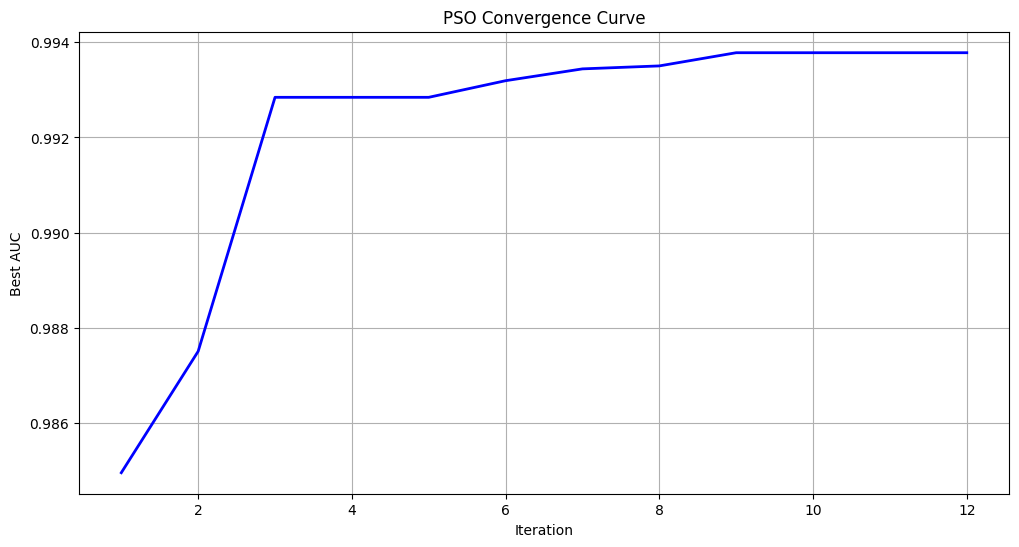

In [50]:
# Cell 10: Visualize convergence
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(convergence_history)+1), convergence_history, 'b-', linewidth=2)
plt.title('PSO Convergence Curve')
plt.xlabel('Iteration')
plt.ylabel('Best AUC')
plt.grid(True)
plt.show()

In [51]:
# Cell 11: Train final model with optimized parameters
def train_final_model(X_train, y_train, X_test, y_test, best_params):
    print("Training final model with optimized parameters...")
    
    # Create the optimized MLP model
    final_model = MLPClassifier(
        hidden_layer_sizes=(int(best_params[0]),),
        learning_rate_init=best_params[1],
        alpha=best_params[2],
        max_iter=500,
        random_state=42
    )
    
    # Train the model
    final_model.fit(X_train, y_train)
    
    # Evaluate on test set
    y_pred = final_model.predict(X_test)
    y_pred_proba = final_model.predict_proba(X_test)
    
    # Calculate metrics
    if y_pred_proba.shape[1] > 2:  # Multi-class
        final_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    else:  # Binary classification
        final_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    
    print(f"\nFinal Test AUC: {final_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    return final_model, final_auc

In [52]:
# Cell 12: Train and evaluate final model
final_model, final_auc = train_final_model(
    X_train, y_train, X_test, y_test, best_params)

Training final model with optimized parameters...

Final Test AUC: 0.9936

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5941
           1       0.94      0.87      0.90     10000
           3       0.87      0.94      0.91     10000
           4       0.86      0.84      0.85     10000
           5       0.83      0.97      0.89     10000
           6       0.97      0.79      0.87     10000
           7       0.60      0.12      0.21        24
           8       0.89      0.90      0.90       294
           9       0.90      0.99      0.94      1850
          10       0.85      0.85      0.85     10000

    accuracy                           0.89     68109
   macro avg       0.87      0.83      0.83     68109
weighted avg       0.89      0.89      0.89     68109


Confusion Matrix:
[[5845   48   41    0    2    0    0    1    4    0]
 [ 106 8684 1205    0    1    1    0    0    2    1]
 [  26  530 9442  

In [53]:
# Cell 13: Save the optimized model
model_filename = 'optimized_mlp_model.pkl'
joblib.dump(final_model, model_filename)
print(f"Model saved to {model_filename}")

# Save best parameters to a text file
params_filename = 'best_parameters.txt'
with open(params_filename, 'w') as f:
    f.write(f"Hidden Layer Neurons: {int(best_params[0])}\n")
    f.write(f"Learning Rate: {best_params[1]:.6f}\n")
    f.write(f"Regularization Alpha: {best_params[2]:.6f}\n")
print(f"Parameters saved to {params_filename}")

Model saved to optimized_mlp_model.pkl
Parameters saved to best_parameters.txt


In [54]:
# Cell 14 (Optional): Advanced PSO with more hyperparameters
def run_advanced_optimization(X_train, X_val, X_test, y_train, y_val, y_test):
    # Define more parameter bounds and dimensions
    dimensions = 5
    bounds = [
        (10, 200),      # first hidden layer size
        (10, 200),      # second hidden layer size
        (0.0001, 0.1),  # learning rate
        (0.0001, 0.1),  # regularization parameter
        (16, 256)       # batch size
    ]
    
    # PSO parameters
    num_particles = 20
    max_iterations = 30
    
    # Create a subclass with modified fitness function
    class AdvancedPSO(PSO):
        def evaluate_fitness(self, position):
            """Advanced fitness evaluation with more hyperparameters"""
            # Map position elements to MLP hyperparameters
            hidden_layer_sizes = (int(position[0]), int(position[1]))  # Two hidden layers
            learning_rate_init = position[2]
            alpha = position[3]  # L2 regularization
            batch_size = int(position[4])
            
            try:
                # Create and train MLP
                mlp = MLPClassifier(
                    hidden_layer_sizes=hidden_layer_sizes,
                    learning_rate_init=learning_rate_init,
                    alpha=alpha,
                    batch_size=batch_size,
                    max_iter=100,
                    random_state=42
                )
                
                mlp.fit(self.X_train, self.y_train)
                y_pred_proba = mlp.predict_proba(self.X_val)
                
                if y_pred_proba.shape[1] > 2:
                    auc = roc_auc_score(self.y_val, y_pred_proba, multi_class='ovr')
                else:
                    auc = roc_auc_score(self.y_val, y_pred_proba[:, 1])
                    
                return auc
            except Exception as e:
                print(f"Error during fitness evaluation: {e}")
                return -np.inf
    
    # Initialize and run advanced PSO
    print("\nStarting Advanced PSO optimization with more hyperparameters...")
    pso = AdvancedPSO(dimensions, bounds, num_particles, max_iterations, 
                     X_train, y_train, X_val, y_val)
    
    best_params, best_fitness, convergence_history = pso.optimize()
    
    # Display results
    print("\nAdvanced Optimization Results:")
    print(f"Best AUC: {best_fitness:.4f}")
    print(f"Best Parameters:")
    print(f"- First Hidden Layer: {int(best_params[0])} neurons")
    print(f"- Second Hidden Layer: {int(best_params[1])} neurons")
    print(f"- Learning Rate: {best_params[2]:.6f}")
    print(f"- Regularization Alpha: {best_params[3]:.6f}")
    print(f"- Batch Size: {int(best_params[4])}")
    
    return best_params, best_fitness, convergence_history

# Uncomment to run advanced optimization
# advanced_best_params, advanced_best_fitness, advanced_convergence_history = run_advanced_optimization(
#    X_train, X_val, X_test, y_train, y_val, y_test)